In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 데이터 불러오기 
iris = load_iris()

# 데이터 세트 나누기
trainX, testX, trainY, testY = train_test_split(iris['data'], iris['target'], test_size = 0.2)

In [3]:
# KNN 으로 학습용 데이터 학습한다
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric="minkowski")
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [4]:
# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = knn.score(testX, testY)와 동일함.
predY = knn.predict(testX) # 테스트셋을 이용한 예측값 
accuracy = (testY == predY).mean() # 정확도
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)


* 시험용 데이터로 측정한 정확도 = 0.97


In [5]:
# Train 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
predY = knn.predict(trainX) # 학습한 데이터로 평가 (x), 일반적으로 사용 x
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

* 학습용 데이터로 측정한 정확도 = 0.97


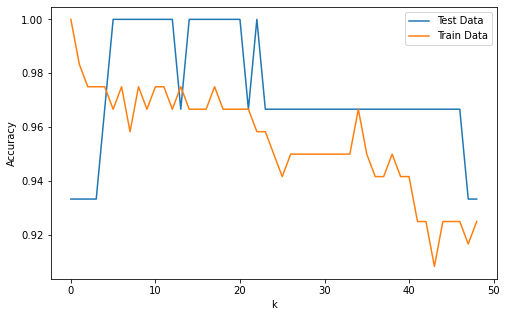

In [6]:
# k를 변화시켜가면서 정확도를 측정해 본다
testAcc = []
trainAcc = []
for k in range(1, 50):
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(trainX, trainY)
    
    # Test 세트의 Feature에 대한 정확도
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))
    
    # Train 세트의 Feature에 대한 정확도
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))

plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()